In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np

In [16]:
df = pd.read_csv("./data/wine-clustering.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [17]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

These all seem continous variables and not cargorical and we have a clustering problem at hand

In [18]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
missing_values = df.isnull().sum()

# Generate descriptive statistics
descriptive_stats = df.describe()

missing_values, descriptive_stats

(Alcohol                 0
 Malic_Acid              0
 Ash                     0
 Ash_Alcanity            0
 Magnesium               0
 Total_Phenols           0
 Flavanoids              0
 Nonflavanoid_Phenols    0
 Proanthocyanins         0
 Color_Intensity         0
 Hue                     0
 OD280                   0
 Proline                 0
 dtype: int64,
           Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
 count  178.000000  178.000000  178.000000    178.000000  178.000000   
 mean    13.000618    2.336348    2.366517     19.494944   99.741573   
 std      0.811827    1.117146    0.274344      3.339564   14.282484   
 min     11.030000    0.740000    1.360000     10.600000   70.000000   
 25%     12.362500    1.602500    2.210000     17.200000   88.000000   
 50%     13.050000    1.865000    2.360000     19.500000   98.000000   
 75%     13.677500    3.082500    2.557500     21.500000  107.000000   
 max     14.830000    5.800000    3.230000     30.000000  

EDA

In [20]:
missing_values = df.isnull().sum()

statistical_summary = df.describe()

missing_values, statistical_summary

(Alcohol                 0
 Malic_Acid              0
 Ash                     0
 Ash_Alcanity            0
 Magnesium               0
 Total_Phenols           0
 Flavanoids              0
 Nonflavanoid_Phenols    0
 Proanthocyanins         0
 Color_Intensity         0
 Hue                     0
 OD280                   0
 Proline                 0
 dtype: int64,
           Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
 count  178.000000  178.000000  178.000000    178.000000  178.000000   
 mean    13.000618    2.336348    2.366517     19.494944   99.741573   
 std      0.811827    1.117146    0.274344      3.339564   14.282484   
 min     11.030000    0.740000    1.360000     10.600000   70.000000   
 25%     12.362500    1.602500    2.210000     17.200000   88.000000   
 50%     13.050000    1.865000    2.360000     19.500000   98.000000   
 75%     13.677500    3.082500    2.557500     21.500000  107.000000   
 max     14.830000    5.800000    3.230000     30.000000  

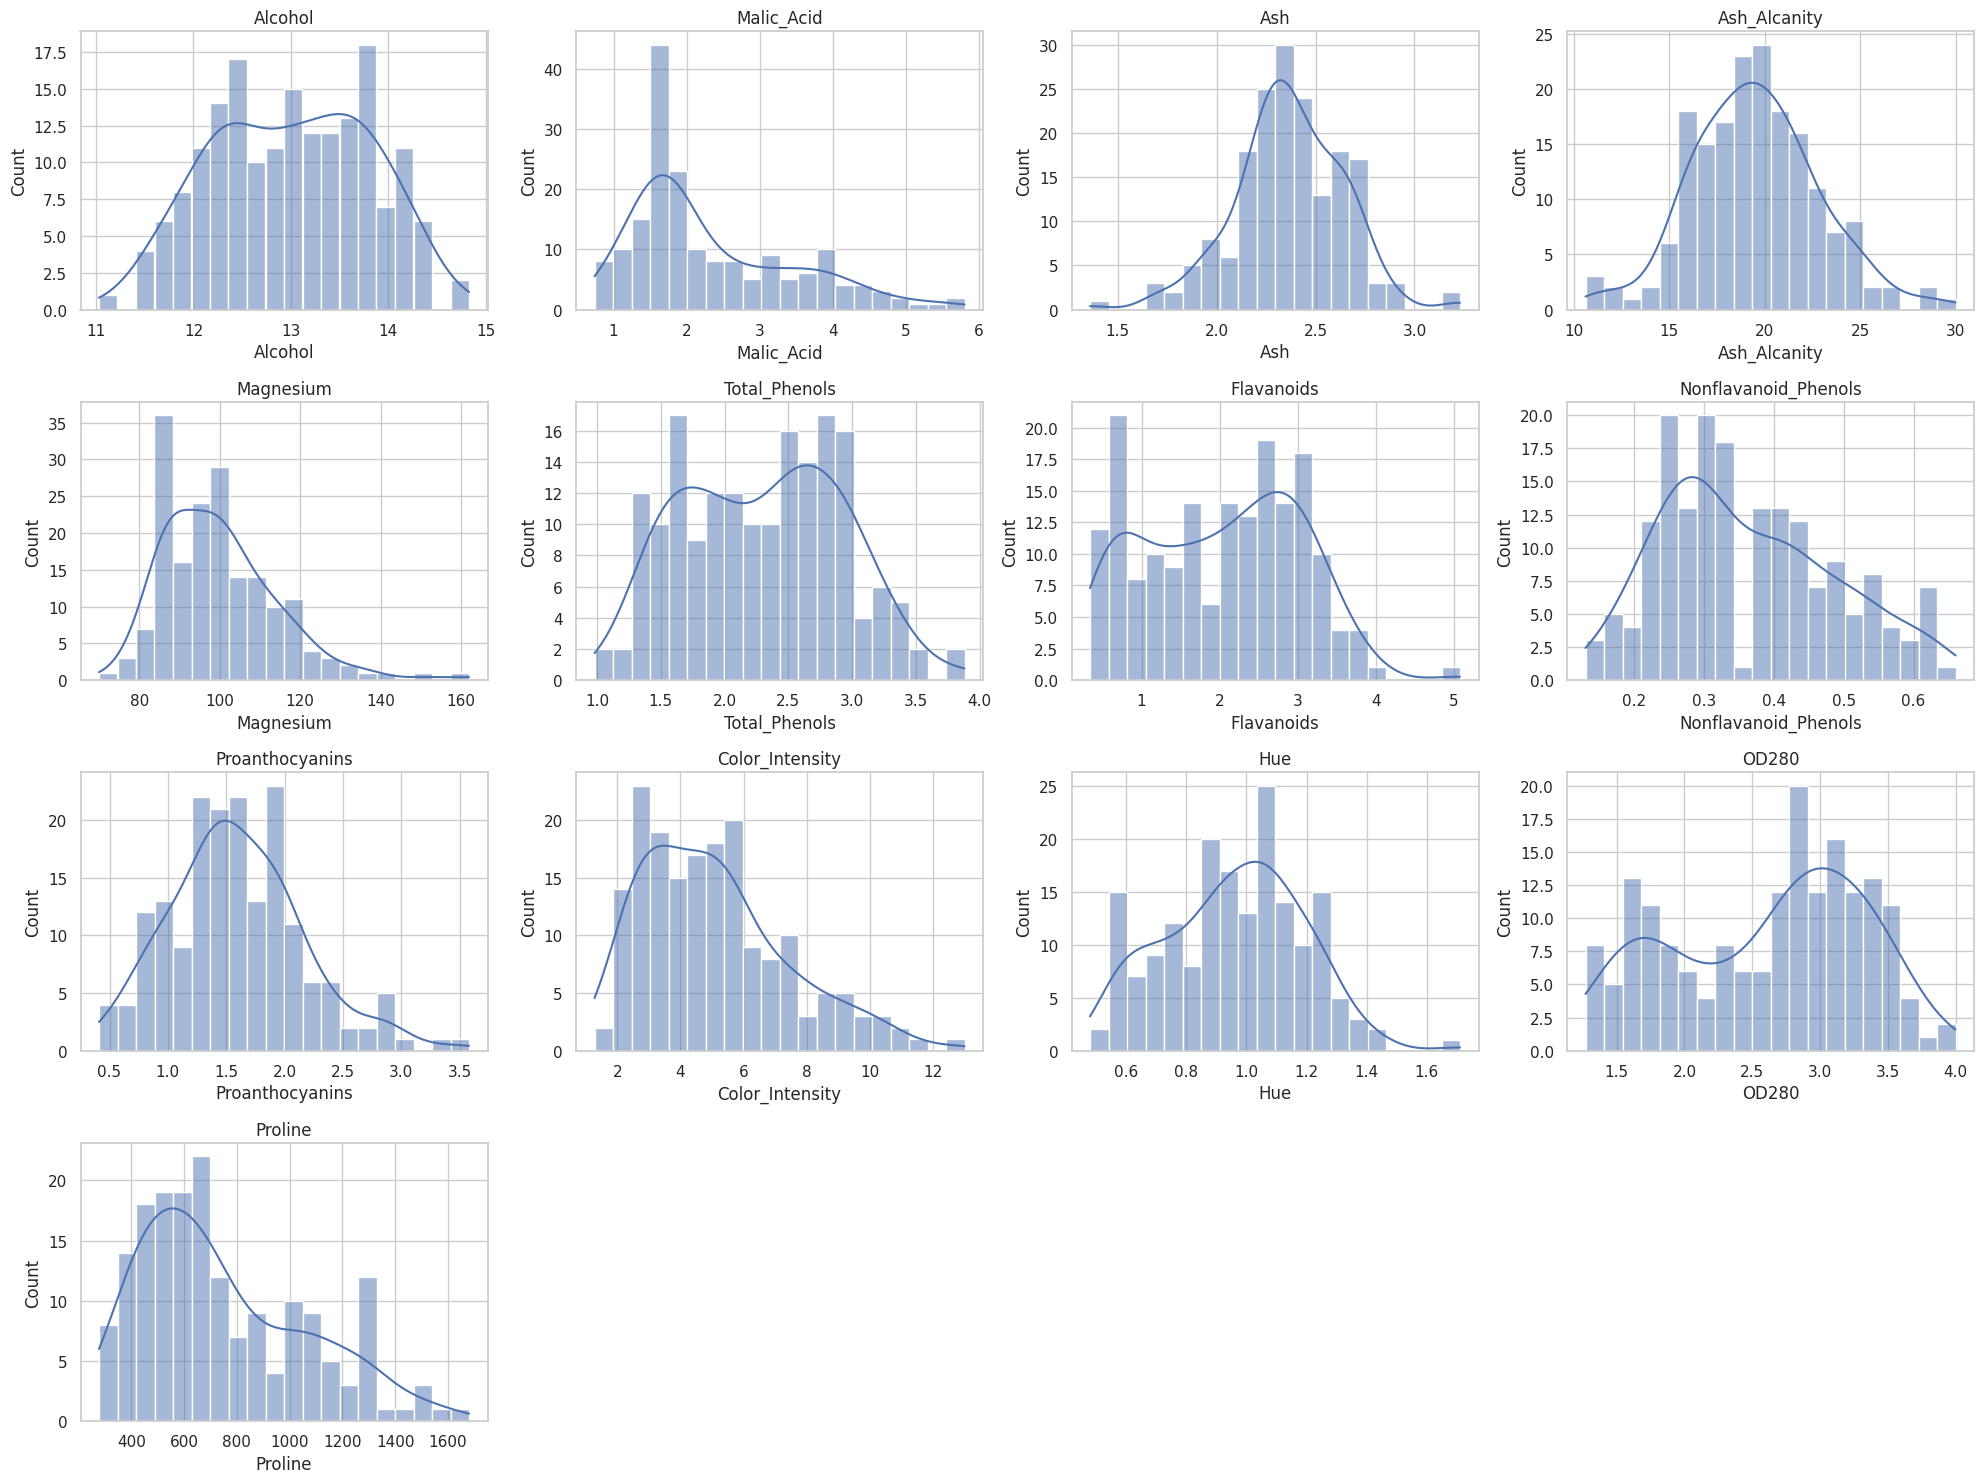

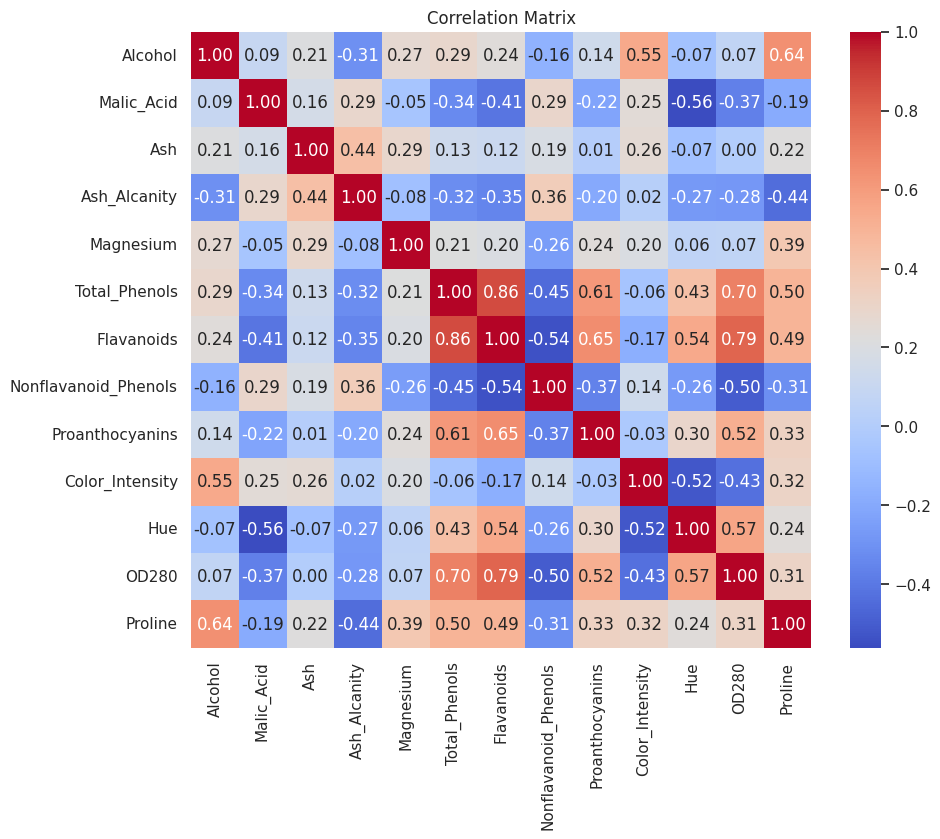

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualizing the distribution of individual features
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(column)

plt.tight_layout()
plt.show()

# Examining correlations between features
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
